Os modelos de previsão serão trabalhados com dados de PLD horário de 01/01/2019 atá 01/01/2020, mas é aberta a utilização de outros tipos e formatos de dados.

## Importação de Bibliotecas

In [1]:
# Manipulação dos Dados
import numpy as np
import pandas as pd
# Modelagem
from statsmodels.tsa.api import SimpleExpSmoothing
# Visualização de Dados
import matplotlib.pyplot as plt

## Importação dos Dados

In [2]:
# Carregamento do dataset de PLD
data = pd.read_excel("dados_pld.xlsx", index_col="data").dropna()
data = data["2019-01-01 00:00:00":"2020-01-01 00:00:00"]
data.head()

,PLD
data,
2019-01-01 00:00:00,42.35
2019-01-01 01:00:00,42.35
2019-01-01 02:00:00,42.35
2019-01-01 03:00:00,42.35
2019-01-01 04:00:00,42.35


## Sem Otimização

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


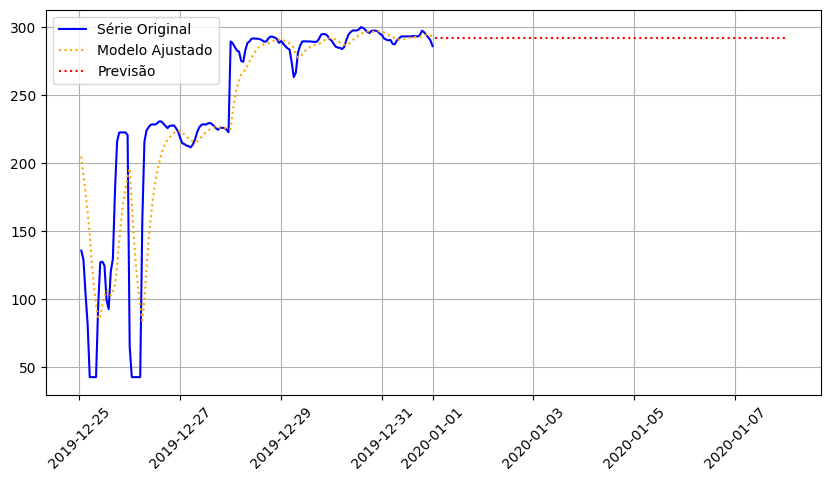

In [3]:
fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(168)
plt.figure(figsize=(10, 5))
plt.plot(data.iloc[-168:], label="Série Original", color="blue")
plt.plot(fit1.fittedvalues.iloc[-168:], ls='dotted',  color='orange', label="Modelo Ajustado")
plt.plot(fcast1, ls='dotted', color='red', label="Previsão")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

## Com Otimização

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


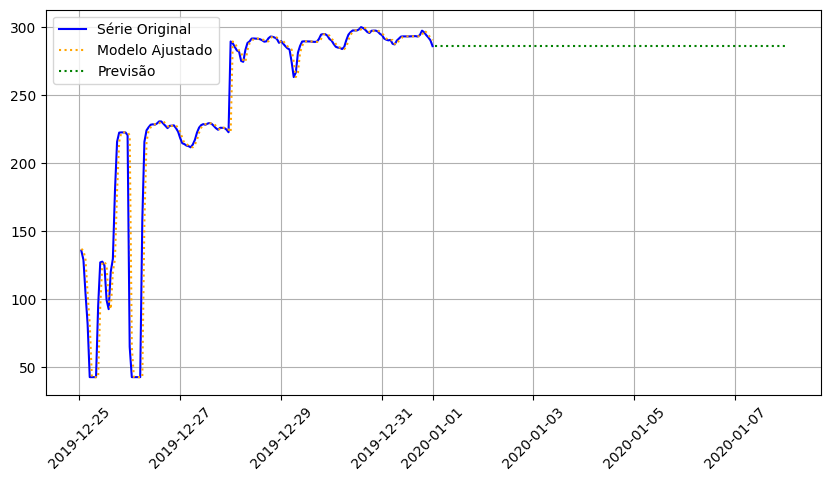

In [4]:
fit3 = SimpleExpSmoothing(data).fit(optimized=True)
fcast3 = fit3.forecast(168)
plt.figure(figsize=(10, 5))
plt.plot(data.iloc[-168:], label="Série Original", color="blue")
plt.plot(fit3.fittedvalues.iloc[-168:], ls='dotted', color='orange', label="Modelo Ajustado")
plt.plot(fcast3, ls='dotted', color='green', label="Previsão")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()